## Road to Viz Expert!!!

![app store](https://developer.apple.com/news/images/og/app-store-og.png)

I would like to record my practice to become an expert in data visualization. 

> And I finally become Kaggle Notebook Master!

---

**Table of Contents**

- Import Default Library & Check Data
- Simple Ideas Of Visualization
- Check Missing Data (**`Missingno`**)
- Name & Subtitle (**`Word Cloud`**)
- Icon URL (**`Requests` & Crawling**)
- Average User Rating (**`Bokeh`** : Countplot Compare)
- Price & Rating (**`Seaborn`** : Regplot, Lmplot)
- Primary Genre & Genres (**`NetworkX`**, Network Graph, seaborn heatmap)
- Primary Genre & Genres (**`Squarify`**, Treemap)
- Primary Genre & Genres (**`PyWaffle`**, Waffle Chart)
- Original Release Date & Size (Time Series with bokeh)



## Import default Library & Check Data 
<a id="#1"></a>


In [1]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')


# Bokeh (interactive visualization)
import bokeh
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure
output_notebook() # You can use output_file()

# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

# Check file list
import os
print(os.listdir('../input/17k-apple-app-store-strategy-games'))

Loading BokehJS ...

['appstore_games.csv']


In [2]:
# Version Check!!
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("bokeh", bokeh.__version__)
print("missingno", missingno.__version__)
print("wordcloud", wordcloud.__version__)
print("networkX", nx.__version__)

matplotlib 3.0.3
seaborn 0.9.0
bokeh 1.3.4
missingno 0.4.2
wordcloud 1.5.0
networkX 2.3


In [3]:
data = pd.read_csv('../input/17k-apple-app-store-strategy-games/appstore_games.csv')

You can check the simple data information by using `describe` method.

In [4]:
data.describe() #numeric

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [5]:
data.describe(include='O') #categorical

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/tic-math-toe-by-...,Diamonds Mania 2,Emoji Stickers,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


## Simple Ideas of Visualization
<a id="#2"></a>


**Goal : Create a story with visualization**

### Single Feature

Here's a simple idea about handling a single feature:

| Column Name                  | Type             | Simple Idea                     | Check|
| ---------------------------- | ---------------- | ------------------------------- | ---- |
| URL                          | Text(url)        | need to drop                    | O |
| ID                           | Number(key_id)   | need to drop                    | O |
| Name                         | Text (Title)     | Word Cloud                      | O |
| Subtitle                     | Text (Sub_Title) | Word Cloud                      | O |
| Icon URL                     | Text(url)        | Crawling Image                  | O |
| Average User Rating          | Float(Score)     | Countplot                       | O |
| User Rating Count            | Int(Counting)    | Outlier, Pie Chart              |   |
| Price                        | Float(Price)     | Outlier, Pie Chart              | O |
| In-app Purchases             | Float(Price)     | preprocessing, minmax graph     |   |
| Description                  | Text             | need to drop                    |   |
| Developer                    | Text             | WordCloud?                      |   |
| Age Rating                   | Int(Ordinal)     | '+' remove                      |   |
| Language                     | Text             | TreeMap, Countplot              |   |
| Size                         | Int (Byte)       | Unit Converting, distplot       | O |
| Primary Genre                | Text             | treemap                         | O |
| Genres                       | Text             | treemp, network graph           | O |
| Original Release Date        | Date             | Time Series                     | O |
| Current Version Release Date | Date             | Time Series                     |   |


### Two or More Features

Let's make more stories in Data

- Price & User Rating Count : Could paid apps lead to user reactions?
- Price & Age Rating : Price by age group
- Genre & Size: Relationship between Genre and Size (add more features and make simple regression model)
- Title & Subtitle & Genres : Tendency of titles by genre


In [6]:
data = data.drop(['URL', 'ID'], axis=1)

## Check Missing Data (missingno)
<a id="#3"></a>

`missingno` provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

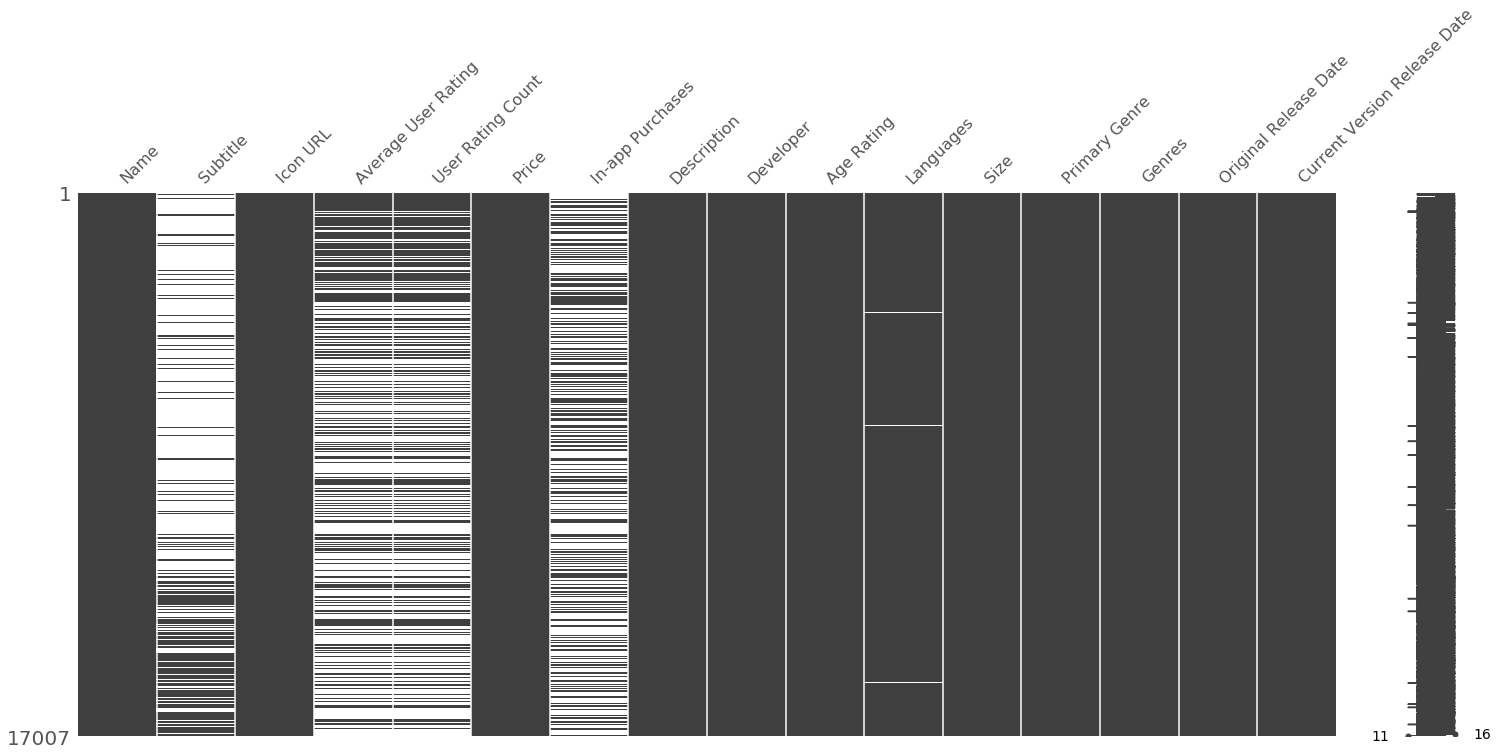

In [7]:
msno.matrix(data)

In [8]:
print(data.columns)

Index(['Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


## Name & Subtitle (Word Cloud)
<a id="#4"></a>


- Which words are most used

A **tag cloud** (**word cloud**, or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text.

Using WordCloud package, we can easily make workcloud image.



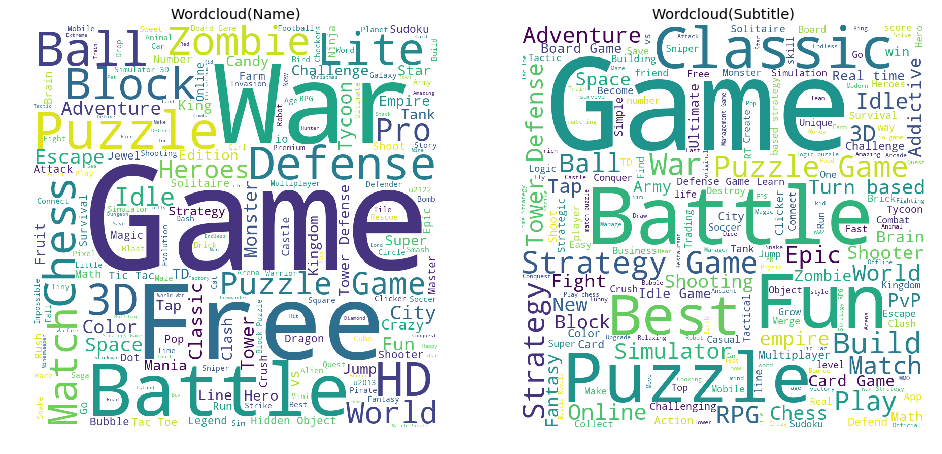

CPU times: user 3.76 s, sys: 79.3 ms, total: 3.83 s
Wall time: 3.84 s


In [9]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

- **Name**
    - Game, Free, War, Defense, Puzzle, Block, Chess
- **Subtitle**
    - Game, Classic, Battle, Puzzle, Best, Fun

## Icon URL (requests & Crawling)
<a id="#5"></a>

This data is provided as a URL. In this case, you can get it by crawling. Please check your internet connection.

- single url crawling: 0.5 sec
- total : 17000 * 0.5 = 8500 s = over 2 hour.. OMG 

just testing sample code (100 image)

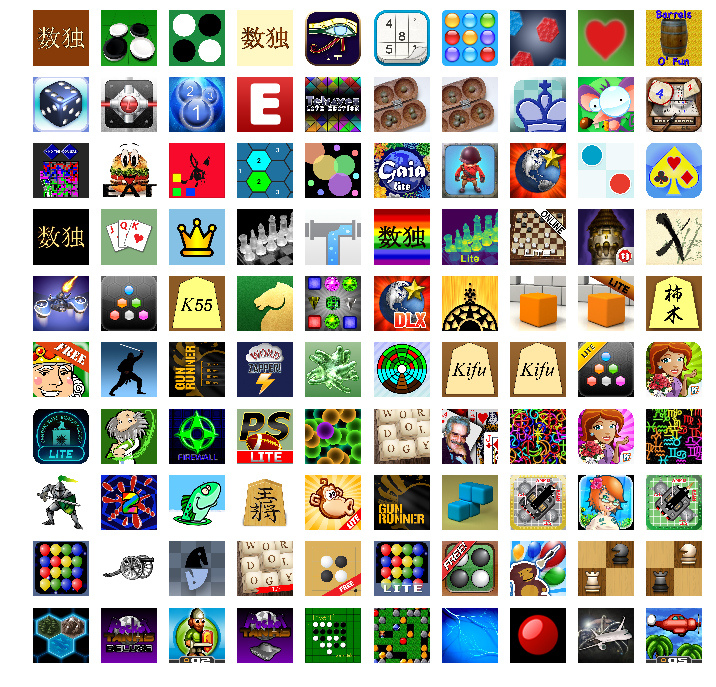

CPU times: user 7.98 s, sys: 224 ms, total: 8.2 s
Wall time: 17.1 s


In [10]:
%%time
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

fig, ax = plt.subplots(10,10, figsize=(12,12))

for i in range(100):
    r = requests.get(data['Icon URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

## Average User Rating (Bokeh : countplot compare)
<a id="#6"></a>

Bokeh don't have countplot. so we have to implement ad-hoc

1. Use Pandas method : `value_counts()` 
2. Sort this values. Becauses `value_counts()` values are already sort by counting numbers. use `sort_index()`
3. x_range should be string list. so use `map` to convert index values

In [11]:
aur = data['Average User Rating'].value_counts().sort_index()
p = figure(x_range=list(map(str, aur.index.values)), 
           plot_height=250, title="Average User Rating", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, aur.index.values)), 
       top=aur.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

You can use this on **seaborn** and **matplotlib** like this

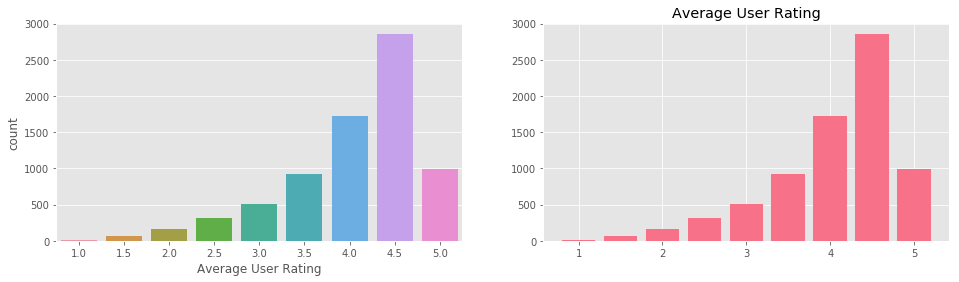

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16, 4))
sns.countplot(data['Average User Rating'],ax=ax[0]) # seaborn
ax[1].bar(aur.index, aur, width=0.4) # matplotlib
ax[1].set_title('Average User Rating')
plt.show()

## Price & Rating (seaborn : regplot, lmplot)
<a id="#7"></a>

In [13]:
# price_column = list(map(str, data['Price'].value_counts().sort_index().index))
# rating_index = list(map(str, data['Average User Rating'].value_counts().sort_index().index))
# pr_table = pd.DataFrame(columns=price_column, index=rating_index)

# for price in price_column:
#     for rate in rating_index:
#         pr_table[price][rate] = len(data[(data['Price']==float(price) )& (data['Average User Rating'] == float(rate))])
        
# pr_table

I want to look at the relationship between price and rating. Use regplot as a simple plot for this

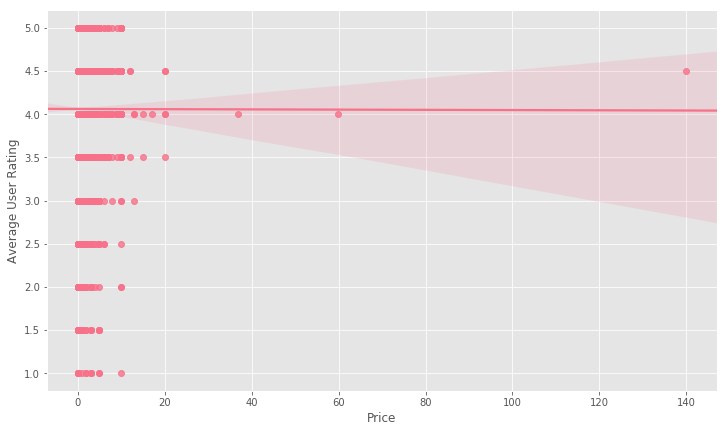

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Average User Rating', ax=ax)
plt.show()

As you can see, there seems to be little relationship between price and rating. Most of the ratings are 4 points.

How about mean and std value?

In [15]:
price_list = sorted(data['Price'].dropna().unique())
rating_stat = pd.DataFrame(columns=['mean', 'std', 'count'], index=price_list)
for price in price_list:
    tmp = data[data['Price']==price]['Average User Rating'].dropna()
    rating_stat['mean'][price] = tmp.mean()
    rating_stat['std'][price] = tmp.std()
    rating_stat['count'][price] = len(tmp)

rating_stat.T.head(len(price_list))

,0.00,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,...,16.99,18.99,19.99,29.99,36.99,37.99,59.99,99.99,139.99,179.99
mean,4.07123,3.90341,4.02239,4,4.1619,4.06216,4,4.17308,4.15,4.16667,...,4,NaN,4.1,NaN,4,NaN,4,NaN,4.5,NaN
std,0.745921,0.79746,0.814399,0.827804,0.60246,0.780312,0.666667,0.488719,0.579751,0.389249,...,NaN,NaN,0.41833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,6325,352,201,252,105,185,28,26,10,12,...,1,0,5,0,1,0,1,0,1,0


There seems to be no tendency

## Primary Genre & Genres (Heatmap + networkx, Network Graph, Treemap)
<a id="#8"></a>

Not surprisingly, Games are the majority.





In [16]:
genre = data['Primary Genre'].value_counts()
p = figure(x_range=list(map(str, genre.index.values)), 
           plot_height=250, plot_width=1500, title="Primary Genre", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, genre.index.values)), 
       top=genre.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

How about sub-Genres?

In [17]:
data['Genres'].head()

0              Games, Strategy, Puzzle
1               Games, Strategy, Board
2               Games, Board, Strategy
3              Games, Strategy, Puzzle
4    Games, Strategy, Board, Education
Name: Genres, dtype: object

In [18]:
data['GenreList'] = data['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
data['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [19]:
gameTypes = []
for i in data['GenreList']: gameTypes += i
gameTypes = set(gameTypes)
print("There are {} types in the Game Dataset".format(len(set(gameTypes))))

There are 56 types in the Game Dataset


How do you know the correlation between them?

1. heatmap : using `seaborn` heatmap
2. graph : using `networkx` and `plotly`

### heatmap (correlation)

A **heatmap** is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Usually we use corr to calculate the correlation and draw it as a heatmap.

It is also effective for drawing contours from three-dimensional data.

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

test = data['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

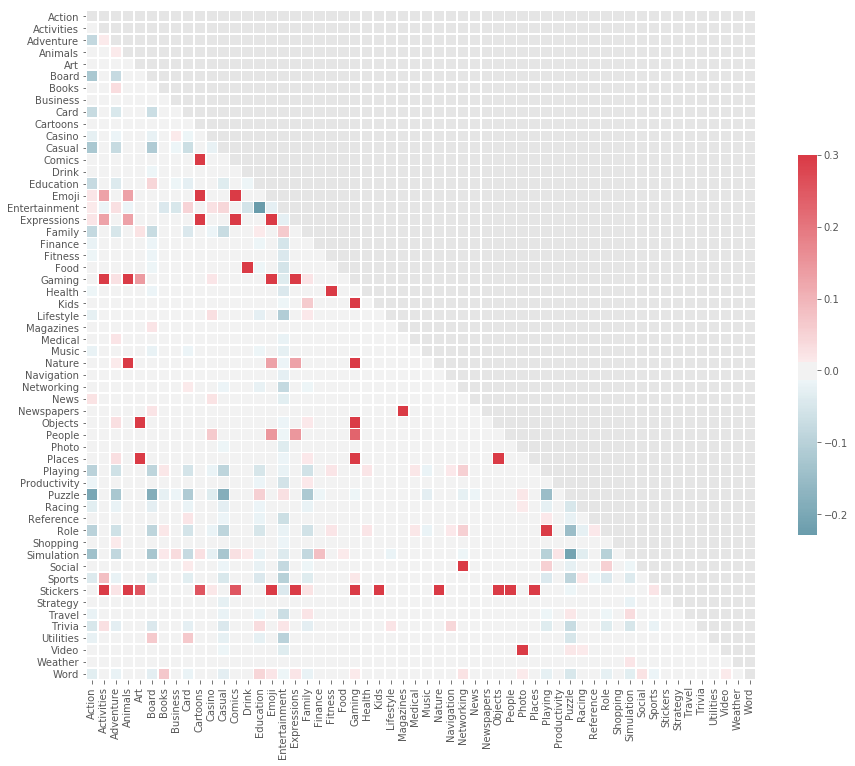

In [21]:

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Graph (corr)

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

**Reference**
- [Visualising stocks correlations with Networkx](https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e)

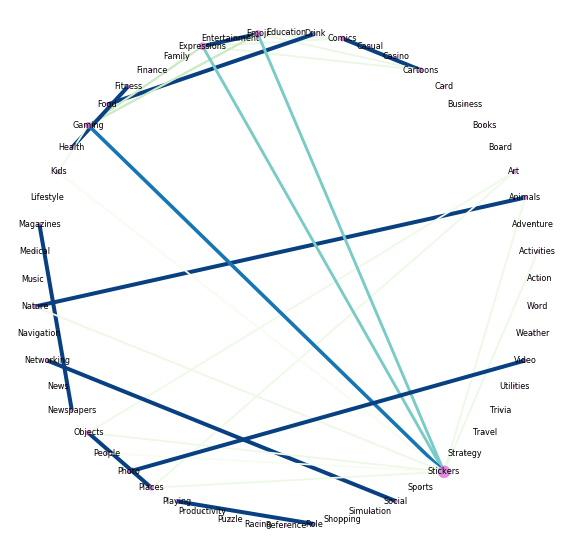

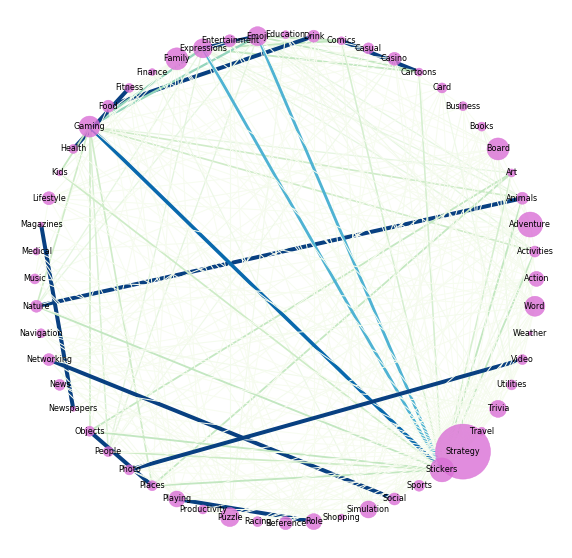

In [22]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

### Treemap (counting based)

`squarify` can draw Treemap, but I prefer `plotly`'s treemap. ;)

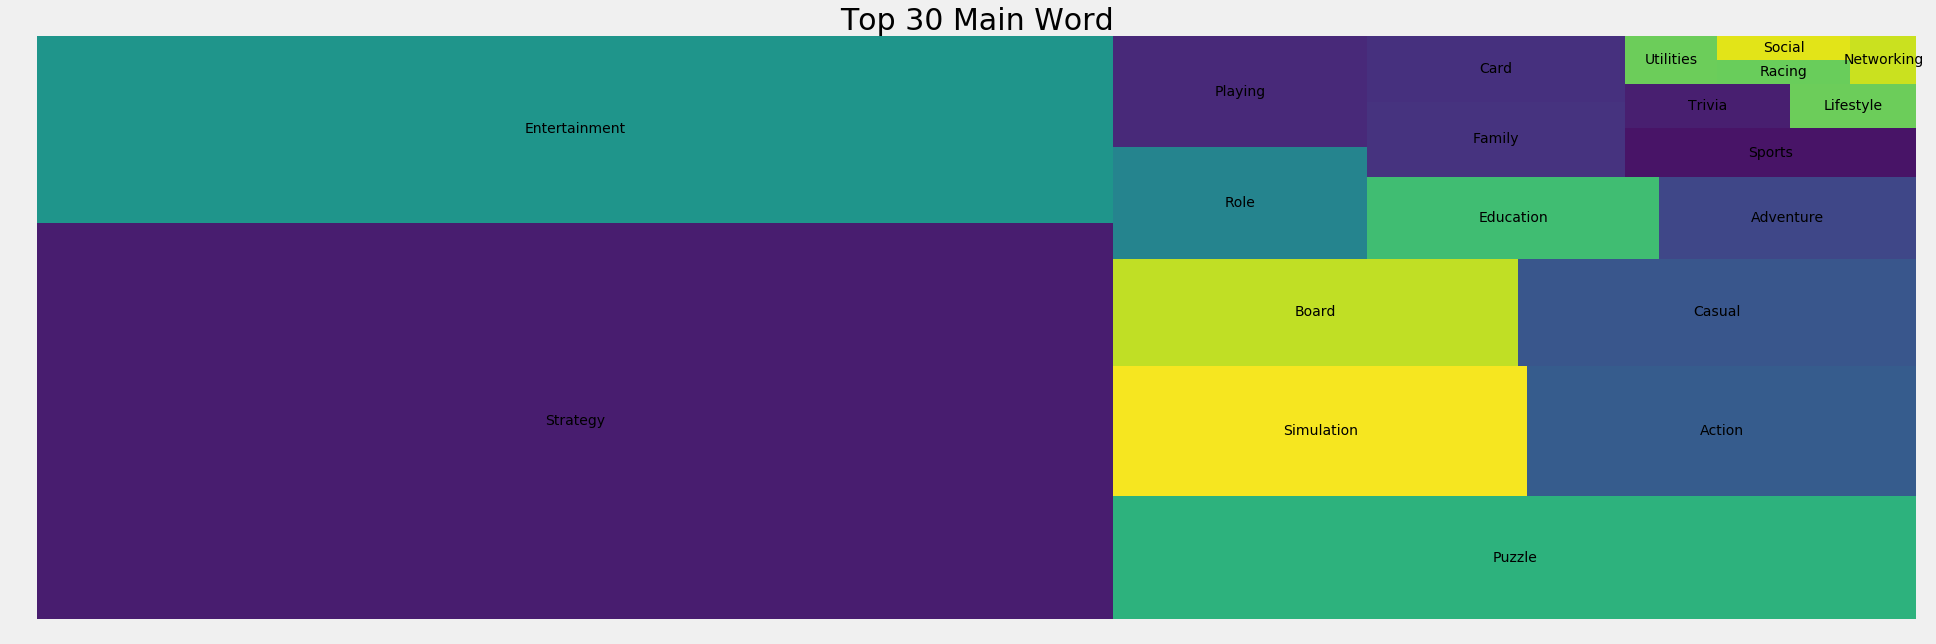

In [23]:
import squarify
y = res.apply(sum).sort_values(ascending=False)[:20]
    
plt.rcParams['figure.figsize'] = (30, 10)
plt.style.use('fivethirtyeight')

squarify.plot(sizes = y.values, label = y.index)
plt.title('Top 30 Main Word', fontsize = 30)
plt.axis('off')
plt.show()

### Waffle Chart (counting base)

you can draw waffle chart by using `pywaffle`.

In [24]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 2.8MB/s 


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


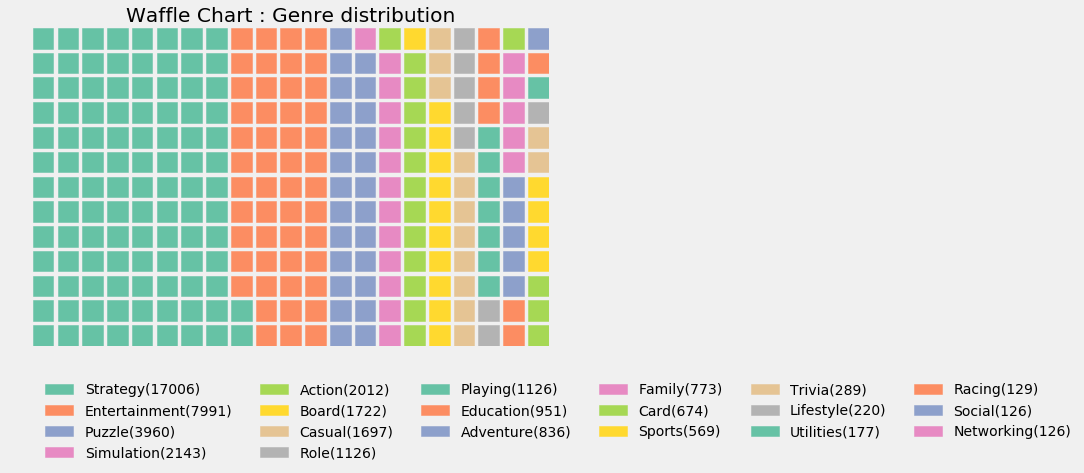

In [25]:
# type 2 : Auto-Size
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(y)//3,  'framealpha': 0},
    font_size=20, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Waffle Chart : Genre distribution')

plt.show()

## Original Release Date & Size (time series with bokeh)
<a id="#9"></a>

We will look at trends in app size over time.

1. First, Convert `str` to `datetime` type
2. re-index by using `set_index`

In [26]:
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'], format = '%d/%m/%Y')
date_size = pd.DataFrame({'size':data['Size']})
date_size = date_size.set_index(data['Original Release Date'])
date_size = date_size.sort_values(by=['Original Release Date'])
date_size.head()

,size
Original Release Date,
2008-07-11,15853568.0
2008-07-11,12328960.0
2008-07-11,674816.0
2008-07-18,34689024.0
2008-07-23,21552128.0


In [27]:
date_size['size'] = date_size['size'].apply(lambda b : b//(2**10)) # B to KB

Simple Plotting version.

In [28]:
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size')
fig.line(y='size', x='Original Release Date', source=date_size)
show(fig)

Let's look at the month for trends.

We can use `resample` method. 

The criteria for grouping depend on the parameters.

'M' means 'end of month', 'Y' means 'Year'.

In [29]:
monthly_size = date_size.resample('M').mean()
tmp = date_size.resample('M')
monthly_size['min'] = tmp.min()
monthly_size['max'] = tmp.max()
monthly_size.head()

,size,min,max
Original Release Date,,,
2008-07-31,19545.142857,659.0,47532.0
2008-08-31,32178.300000,714.0,119948.0
2008-09-30,11157.166667,433.0,51012.0
2008-10-31,24377.285714,1268.0,73283.0
2008-11-30,12429.666667,1710.0,43291.0


In [30]:
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size (Monthly)')
fig.line(y='size', x='Original Release Date', source=monthly_size, line_width=2, line_color='Green')
show(fig)

In [31]:
yearly_size = date_size.resample('Y').mean()
monthly_size.head()
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size (Monthly & Yearly)')
fig.line(y='size', x='Original Release Date', source=monthly_size, line_width=2, line_color='Green', alpha=0.5)
fig.line(y='size', x='Original Release Date', source=yearly_size, line_width=2, line_color='Orange', alpha=0.5)
show(fig)

**If you like this notebook, please upvote :)**

---

`use` means what i used.

### Static


| Name           | Description                                | Documentation                                          | Github                                             | use |
| -------------- | ------------------------------------------ | ------------------------------------------------------ | -------------------------------------------------- | --- |
| **matplotlib** | base | [matplotlib](https://matplotlib.org/)                  | [github](https://github.com/matplotlib/matplotlib) | O   |
| **seaborn**    | matplotlib based      | [seaborn](http://seaborn.pydata.org/)                  | [github](https://github.com/mwaskom/seaborn)       | O   |
| **plotnine**   | ggplot2        | [plotnine](https://plotnine.readthedocs.io/en/stable/) | [github](https://github.com/has2k1/plotnine)       | X   |


### Interactive


| Name          | Description | Documentation                            | Github                                            | use |
| ------------- | ----------- | ---------------------------------------- | ------------------------------------------------- | --- |
| **plotly**    |             | [plotly](https://plot.ly/python/)        | [github](https://github.com/plotly/plotly.py)     | O   |
| **bokeh**     |             | [bokeh](https://bokeh.org/)              | [github](https://github.com/bokeh/bokeh)          | O   |
| **altair**    |             | [altair](https://altair-viz.github.io/)  | [github](https://github.com/altair-viz/altair)    | O   |
| **pygal**     |             | [pygal](http://www.pygal.org/en/stable/) | [github](https://github.com/Kozea/pygal)          | X   |
| **pyecharts** |             | [pyecharts](https://pyecharts.org/)      | [github](https://github.com/pyecharts/pyecharts/) | X   |

### Network


| Name              | Description | Documentation                                                | Github                                            | use |
| ----------------- | ----------- | ------------------------------------------------------------ | ------------------------------------------------- | --- |
| **networkx**      |             | [networkx](https://networkx.github.io/documentation/stable/) | [github](https://github.com/networkx/networkx)    | O   |
| **python-igraph** |             | [python-igraph](https://igraph.org/python/)                  | [github](https://github.com/igraph/python-igraph) | X   |


### Geo



| Name           | Description                      | Documentation                                                                          | Github                                                                                 | use |
| -------------- | -------------------------------- | -------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- | --- |
| **folium**     | leaflet.js                       | [folium](https://python-visualization.github.io/folium/)                               | [github](https://github.com/python-visualization/folium)                               | O   |
| **geopandas**  |                                  | [geopandas](https://geopandas.readthedocs.io/en/latest/)                               | [github](https://github.com/geopandas/geopandas)                                       | X   |
| **googlemaps** | google map API                    | [googlemaps](https://googlemaps.github.io/google-maps-services-python/docs/index.html) | [github](https://github.com/googlemaps/google-maps-services-python)                    | X   |
| **kepler.gl**  | Jupyter Widget tool(3D) | [kepler.gl](https://docs.kepler.gl/docs/keplergl-jupyter)                              | [github](https://github.com/keplergl/kepler.gl/tree/master/bindings/kepler.gl-jupyter) | X   |

### ETC

| Name          | Description   | Documentation                                          | Github                                               | use |
| ------------- | ------------- | ------------------------------------------------------ | ---------------------------------------------------- | --- |
| **missingno** | missing value        |                                                        | [github](https://github.com/ResidentMario/missingno) | O   |
| **pywaffle**  | waffle chart     | [pywaffle](https://pywaffle.readthedocs.io/en/latest/) | [github](https://github.com/gyli/PyWaffle)           | O   |
| **wordcloud** | wordcloud | [wordcloud](https://amueller.github.io/word_cloud/)    | [github](https://github.com/amueller/word_cloud)     | O   |
| **squarify**  | treemap        |                                                        | [github](https://github.com/laserson/squarify)       | O   |


### Interpretable AI


| Name         | Description     | Documentation                                                 | Github                                      | use |
| ------------ | --------------- | ------------------------------------------------------------- | ------------------------------------------- | --- |
| **SHAP**     | Shapley + @     | [SHAP](https://shap.readthedocs.io/en/latest/#)               | [github](https://github.com/slundberg/shap) | O   |
| **dtreeviz** | decision tree | [dtreeviz](https://explained.ai/decision-tree-viz/index.html) | [github](https://github.com/parrt/dtreeviz) | O   |
| **LIME**     |                 | [LIME](https://lime-ml.readthedocs.io/en/latest/lime.html)    | [github](https://github.com/marcotcr/lime)  | X   |

